<a href="https://colab.research.google.com/github/boing-86/Daily_Study/blob/main/0804_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch

In [14]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [15]:
w = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [16]:
optimizer = torch.optim.SGD([w, b], lr = 0.01)
epochs = 1000

for epoch in range(0, epochs):
  hypothesis = x_train*w + b
  cost = torch.mean((hypothesis - y_train)**2)
  optimizer.zero_grad() #gradient 초기화
  cost.backward() #gradient 계산
  optimizer.step() #gradient 개선

In [22]:
print(w*4 + b)

tensor([7.9495], grad_fn=<AddBackward0>)


### Multivariable Regression

In [35]:
x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 80],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

w = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = torch.optim.SGD([w, b], lr = 1e-5)
epochs = 50

for epoch in range(0, epochs):
  hypothesis = x_train.matmul(w) + b
  cost = torch.mean((hypothesis - y_train)**2)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} hypothesis:{} Cost: {:.6f}'.format(
      epoch, epochs, hypothesis.squeeze().detach(),cost.item()))

Epoch    0/50 hypothesis:tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/50 hypothesis:tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/50 hypothesis:tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/50 hypothesis:tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/50 hypothesis:tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/50 hypothesis:tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/50 hypothesis:tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/50 hypothesis:tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/50 hypothesis:tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/50 hypothesis:tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/50 hypothesis:te

In [46]:
import torch

class MultivariateLinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 80],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

model = MultivariateLinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)
epochs = 50

for epoch in range(0, epochs):
  hypothesis = model(x_train)
  cost = torch.nn.functional.mse_loss(hypothesis, y_train)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} hypothesis:{} Cost: {:.6f}'.format(
      epoch, epochs, hypothesis.squeeze().detach(),cost.item()))

Epoch    0/50 hypothesis:tensor([-40.9351, -46.9649, -50.3703, -50.3092, -36.5263]) Cost: 47328.394531
Epoch    1/50 hypothesis:tensor([43.3324, 54.2923, 45.7511, 58.3361, 40.7162]) Cost: 15225.132812
Epoch    2/50 hypothesis:tensor([ 91.1064, 111.6977, 100.2463, 119.9301,  84.5072]) Cost: 4906.794434
Epoch    3/50 hypothesis:tensor([118.1910, 144.2422, 131.1424, 154.8491, 109.3335]) Cost: 1590.363159
Epoch    4/50 hypothesis:tensor([133.5462, 162.6922, 148.6594, 174.6453, 123.4081]) Cost: 524.419800
Epoch    5/50 hypothesis:tensor([142.2516, 173.1516, 158.5913, 185.8679, 131.3872]) Cost: 181.807281
Epoch    6/50 hypothesis:tensor([147.1871, 179.0810, 164.2231, 192.2299, 135.9107]) Cost: 71.680504
Epoch    7/50 hypothesis:tensor([149.9853, 182.4421, 167.4170, 195.8362, 138.4750]) Cost: 36.277477
Epoch    8/50 hypothesis:tensor([151.5717, 184.3472, 169.2287, 197.8803, 139.9286]) Cost: 24.891209
Epoch    9/50 hypothesis:tensor([152.4712, 185.4268, 170.2569, 199.0387, 140.7525]) Cost: 21.

In [64]:
import torch

class MultivariateLinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

class CustomDataset(torch.utils.data.Dataset):
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 80],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]


  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])

    return x, y
    
model = MultivariateLinearRegressionModel()
dataset = CustomDataset()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)
epochs = 20
cost_list = []

for epoch in range(0, epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples
    hypothesis = model(x_train)
    cost = torch.nn.functional.mse_loss(hypothesis, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    cost_list.append(cost.item())

    print('Epoch {:4d}/{} Batch:{}/{} Cost: {:.6f}'.format(
        epoch, epochs, batch_idx+1, len(dataloader), cost.item()))

Epoch    0/20 Batch:1/3 Cost: 2.560405
Epoch    0/20 Batch:2/3 Cost: 48.264320
Epoch    0/20 Batch:3/3 Cost: 4.079801
Epoch    1/20 Batch:1/3 Cost: 7.114222
Epoch    1/20 Batch:2/3 Cost: 40.930958
Epoch    1/20 Batch:3/3 Cost: 0.000585
Epoch    2/20 Batch:1/3 Cost: 12.321860
Epoch    2/20 Batch:2/3 Cost: 37.182034
Epoch    2/20 Batch:3/3 Cost: 0.080446
Epoch    3/20 Batch:1/3 Cost: 2.252739
Epoch    3/20 Batch:2/3 Cost: 35.886665
Epoch    3/20 Batch:3/3 Cost: 5.181570
Epoch    4/20 Batch:1/3 Cost: 8.102455
Epoch    4/20 Batch:2/3 Cost: 41.032372
Epoch    4/20 Batch:3/3 Cost: 5.658832
Epoch    5/20 Batch:1/3 Cost: 28.854527
Epoch    5/20 Batch:2/3 Cost: 9.927103
Epoch    5/20 Batch:3/3 Cost: 19.219345
Epoch    6/20 Batch:1/3 Cost: 1.766246
Epoch    6/20 Batch:2/3 Cost: 43.498631
Epoch    6/20 Batch:3/3 Cost: 1.671413
Epoch    7/20 Batch:1/3 Cost: 0.719151
Epoch    7/20 Batch:2/3 Cost: 4.676467
Epoch    7/20 Batch:3/3 Cost: 81.810333
Epoch    8/20 Batch:1/3 Cost: 9.559232
Epoch    8/20 B

[2.5604052543640137, 48.264320373535156, 4.079800605773926, 7.114221572875977, 40.93095779418945, 0.0005849229637533426, 12.321860313415527, 37.18203353881836, 0.08044618368148804, 2.252739429473877, 35.88666534423828, 5.181569576263428, 8.102455139160156, 41.032371520996094, 5.65883207321167, 28.85452651977539, 9.927103042602539, 19.219345092773438, 1.76624596118927, 43.49863052368164, 1.6714130640029907, 0.7191508412361145, 4.676467418670654, 81.81033325195312, 9.559231758117676, 18.462709426879883, 66.2628173828125, 12.448676109313965, 21.04202651977539, 63.509246826171875, 37.43750762939453, 26.892648696899414, 0.7530996203422546, 3.6830101013183594, 34.57600402832031, 5.834477424621582, 2.0886969566345215, 38.20384216308594, 0.0089182797819376, 11.193246841430664, 1.0299668312072754, 72.14887237548828, 36.15705108642578, 11.809364318847656, 0.002546293893828988, 10.296435356140137, 0.7632988691329956, 71.46331787109375, 17.473909378051758, 20.91065216064453, 43.78797912597656, 4.6

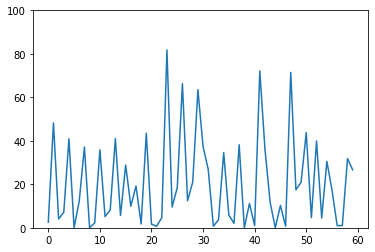

In [69]:
import matplotlib.pyplot as plt
print(cost_list)
print(len(cost_list))
plt.plot(cost_list)
plt.ylim([0, 100])
plt.show()

### Logistic Regrssion

In [86]:
import torch

torch.manual_seed(1)
x_data = [[1,2], [2,3], [3,1], [4,3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

w = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#hypothesis = 1/(1+torch.exp(-(x_train.matmul(w) + b))) #아래와 같음
optimizer = torch.optim.SGD([w, b], lr = 1)
epochs = 1000

for epoch in range(epochs+1):
  hypothesis = torch.sigmoid(x_train.matmul(w) + b)
  cost = torch.nn.functional.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if(epoch % 100 == 0):
    print('Epoch {:4d}/{} Cost:{:.6f}'.format(
        epoch, epochs, cost.item()))


Epoch    0/1000 Cost:0.693147
Epoch  100/1000 Cost:0.134722
Epoch  200/1000 Cost:0.080643
Epoch  300/1000 Cost:0.057900
Epoch  400/1000 Cost:0.045300
Epoch  500/1000 Cost:0.037261
Epoch  600/1000 Cost:0.031672
Epoch  700/1000 Cost:0.027556
Epoch  800/1000 Cost:0.024394
Epoch  900/1000 Cost:0.021888
Epoch 1000/1000 Cost:0.019852


In [87]:
print(hypothesis[:5])
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction[:5])

tensor([[2.7711e-04],
        [3.1636e-02],
        [3.9014e-02],
        [9.5618e-01],
        [9.9823e-01]], grad_fn=<SliceBackward0>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])


### Softmax Classification

In [89]:
import torch
torch.manual_seed(1)

In [91]:
tensor1 = torch.FloatTensor([[1,2,3,4]])
tensor2 = torch.FloatTensor([[5,6,7,8]])

print(torch.cat([tensor1, tensor2], axis=0))

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
